In [3]:
import pandas as pd
import numpy as np
with open('datasets/竞赛数据-最新/附件 1 线网乘客O-D数据.txt','r') as od_f:
    list_data = []
    line = od_f.readline()
    while line:
        line_list = line[:-1].split(',')
        list_data.append(line_list)#去掉换行符
        line = od_f.readline()

In [4]:
j = 0
for i in list_data:
    if j == 3:
        break
    print(i,j)
    j+=1

['乘客编号', '始发车站', '目的地车站', '进站刷卡时刻', '出站刷卡时刻'] 0
['1', '207', '50', '8:21:00', '8:46:07'] 1
['2', '84', '47', '8:24:00', '9:14:24'] 2


In [5]:
f_to_df = pd.DataFrame(columns=list_data[0],data=list_data[1:])
f_to_df

乘客编号 始发车站 目的地车站    进站刷卡时刻    出站刷卡时刻
0              1  207    50   8:21:00   8:46:07
1              2   84    47   8:24:00   9:14:24
2              5  247    51   9:24:00   9:52:22
3              6  166    50   6:55:00   7:50:24
4              7  163    54   6:58:00   7:29:23
5              8  116    50   7:39:00   8:10:16
6             13  253    46   6:23:00   6:53:16
7             14  173    47   5:25:00   6:15:27
8             15   34    46  10:50:00  11:49:02
9             18   40    45   8:05:00   8:18:14
10            19  251    45   8:47:00   9:22:29
11            20  135    53  11:43:00  12:07:05
12            22  179    51   6:45:00   7:46:15
13            23   83    42   6:43:00   7:14:01
14            26  164    52   8:37:00   9:17:21
15            27    6    51  11:15:00  11:59:10
16            28   12    49   7:22:00   7:44:20
17            30  226    38   7:39:00   8:27:00
18            31   95    38   7:30:00   8:16:03
19            32   37    46   6:26:00   6:52:00
20            35  177    50   8:30:00   9:21:20
21            37   37    39   8:44:00   8:52:15
22            39   34    49   7:39:00   8:35:24
23            40   51    38   8:21:00   8:40:12
24            41    1    52   8:17:00   9:17:12
25            43  279    38  11:23:00  12:57:13
26            44  101    38   8:15:00   8:44:26
27            45   12    37  10:49:00  11:05:06
28            46  174    49   7:48:00   8:31:17
29            47    5    42   8:17:00   8:43:12
...          ...  ...   ...       ...       ...
1048545  2437226   97   254   6:25:00   6:43:51
1048546  2437229  240   254   8:07:00   8:26:21
1048547  2437231   69   255   6:41:00   7:47:15
1048548  2437232   66   254   8:19:00   8:48:38
1048549  2437234  204   260   9:09:00  10:18:55
1048550  2437235  235   254   7:47:00   9:05:45
1048551  2437237  256   254   8:17:00   8:33:12
1048552  2437239  252   254  10:01:00  10:40:59
1048553  2437241  240   254  11:11:00  11:41:40
1048554  2437242   34   254   7:44:00   9:25:06
1048555  2437244  277   254   6:52:00   8:00:31
1048556  2437245  245   254   9:23:00   9:35:39
1048557  2437246  244   254   7:36:00   7:44:06
1048558  2437247   75   254   8:10:00   8:52:43
1048559  2437248  244   254   9:47:00   9:59:37
1048560  2437250  164   254   7:40:00   7:54:49
1048561  2437256  247   254   9:24:00   9:42:57
1048562  2437258   94   256   8:46:00  10:02:10
1048563  2437260   34   254   6:48:00   8:21:59
1048564  2437262  258   255   8:13:00   8:29:25
1048565  2437265  219   254   9:04:00   9:44:32
1048566  2437273  242   255   8:28:00   8:45:28
1048567  2437275  246   254   9:46:00   9:59:36
1048568  2437276  258   254   7:54:00   8:27:32
1048569  2437277  133   255   7:38:00   8:32:21
1048570  2437278  245   254   9:01:00   9:11:07
1048571  2437279   42   254   8:20:00   8:55:57
1048572  2437281  251   254   9:14:00   9:54:34
1048573  2437282  259   254   7:33:00   7:59:43
1048574  2437283  283   254   7:57:00   8:42:32

[1048575 rows x 5 columns]

In [6]:
count = 0
for i in f_to_df['乘客编号'].duplicated():
    if i == True:
        count = count + 1
count
#无重复值

0

In [7]:
from datetime import datetime
a = datetime.strptime(f_to_df['进站刷卡时刻'][0],'%H:%M:%S')
b = datetime.strptime(f_to_df['进站刷卡时刻'][1],'%H:%M:%S')
c = b - a
print(type(c.seconds))

<class 'int'>


In [8]:
dict_1 = [0 for i in range(24)]

In [9]:
dict_1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
j = 0 
for index in f_to_df.index:
    str_H = f_to_df.loc[index][3].split(':')
    int_H = int(str_H[0])
    if int_H >= 0 and int_H < 1:
        dict_1[0]+=1
    elif int_H >= 1 and int_H < 2:
        dict_1[1]+=1
    elif int_H >= 2 and int_H < 3:
        dict_1[2]+=1
    elif int_H >= 3 and int_H < 4:
        dict_1[3]+=1
    elif int_H >= 4 and int_H < 5:
        dict_1[4]+=1
    elif int_H >= 5 and int_H < 6:
        dict_1[5]+=1
    elif int_H >= 6 and int_H < 7:
        dict_1[6]+=1
    elif int_H >= 7 and int_H < 8:
        dict_1[7]+=1
    elif int_H >= 8 and int_H < 9:
        dict_1[8]+=1
    elif int_H >= 9 and int_H < 10:
        dict_1[9]+=1
    elif int_H >= 10 and int_H < 11:
        dict_1[10]+=1
    elif int_H >= 11 and int_H < 12:
        dict_1[11]+=1
    elif int_H >= 12 and int_H < 13:
        dict_1[12]+=1
    elif int_H >= 13 and int_H < 14:
        dict_1[13]+=1
    elif int_H >= 14 and int_H < 15:
        dict_1[14]+=1
    elif int_H >= 15 and int_H < 16:
        dict_1[15]+=1
    elif int_H >= 16 and int_H < 17:
        dict_1[16]+=1
    elif int_H >= 17 and int_H < 18:
        dict_1[17]+=1
    elif int_H >= 18 and int_H < 19:
        dict_1[18]+=1
    elif int_H >= 19 and int_H < 20:
        dict_1[19]+=1
    elif int_H >= 20 and int_H < 21:
        dict_1[20]+=1
    elif int_H >= 21 and int_H < 22:
        dict_1[21]+=1
    elif int_H >= 22 and int_H < 23:
        dict_1[22]+=1
    elif int_H >= 23 and int_H < 24:
        dict_1[23]+=1

In [11]:
dict_1

[18,
 0,
 1,
 0,
 547,
 22088,
 119979,
 329623,
 286654,
 129888,
 82848,
 76929,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

No handles with labels found to put in legend.


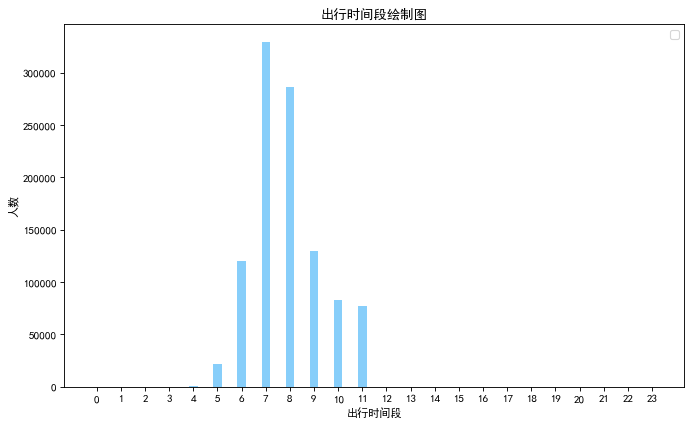

In [18]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6), dpi=80)

# 再创建一个规格为 1 x 1 的子图
plt.subplot(1, 1, 1)

# 柱子总数
N = 24
# 包含每个柱子对应值的序列
values = dict_1

# 包含每个柱子下标的序列
index = np.arange(N)

# 柱子的宽度
width = 0.35

# 绘制柱状图, 每根柱子的颜色为紫罗兰色
p2 = plt.bar(index, values, width, color="#87CEFA")

# 设置横轴标签
plt.xlabel('出行时间段')
# 设置纵轴标签
plt.ylabel('人数')

# 添加标题
plt.title('出行时间段绘制图')

# 添加纵横轴的刻度
num = (i for i in range(24))
plt.xticks(index, num)

# 添加图例
plt.legend(loc="upper right")

plt.show()

In [19]:
from datetime import datetime
text = '2012-09-20'
y = datetime.strptime(text, '%Y-%m-%d')
z = datetime.now()
diff = z - y
diff

datetime.timedelta(2395, 20351, 524584)

In [20]:
time_cha = [0 for i in range(8)]
for index in f_to_df.index:
    date1 = f_to_df.loc[index][3]
    date2 = f_to_df.loc[index][4]
    time1 = datetime.strptime(date1,'%H:%M:%S')
    time2 = datetime.strptime(date2,'%H:%M:%S')
    cha = time2-time1
    seconds = cha.seconds
    if seconds < 600:
        time_cha[0] += 1
    elif seconds < 1200:
        time_cha[1] += 1
    elif seconds < 1800:
        time_cha[2] += 1
    elif seconds < 2400:
        time_cha[3] += 1
    elif seconds < 3000:
        time_cha[4] += 1
    elif seconds < 3600:
        time_cha[5] += 1
    elif seconds < 7200:
        time_cha[6] += 1
    else:
        time_cha[7] += 1

In [21]:
time_cha

[35129, 147429, 208615, 204700, 168990, 118399, 158421, 6892]

No handles with labels found to put in legend.
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "". Falling back on "best"; valid locations are
	lower left
	center
	upper center
	right
	lower center
	center left
	center right
	lower right
	best
	upper right
	upper left

  % (loc, '\n\t'.join(self.codes)))


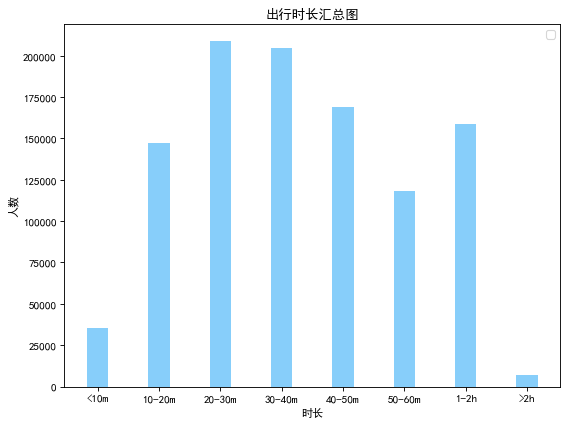

In [22]:
indexs = ('<10m','10-20m','20-30m','30-40m','40-50m','50-60m','1-2h','>2h')
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
N = 8
values = time_cha
index = np.arange(N)
width = 0.35
p2 = plt.bar(index, values, width, color="#87CEFA")
plt.xlabel('时长')
plt.ylabel('人数')

plt.title('出行时长汇总图')

plt.xticks(index, indexs)

# 添加图例
plt.legend(loc="")

plt.show()

In [23]:
dt = dict()

for index in f_to_df.index:
    date1 = int(f_to_df.loc[index][1])
    date2 = int(f_to_df.loc[index][2])
    if date1<date2:
        a = date1
        b = date2
    else:
        a = date2
        b = date1
    strd = str(a)+'-'+str(b)
    if strd in dt.keys():
        dt[strd] += 1
    else:
        dt[strd] = 0

In [24]:
for k,v in dt.items():
    dt[k]+=1

In [25]:
a=0
for k,v in dt.items():
    print(k,v,a)
    a+=1

128-141 1 0
131-229 19 1
37-152 17 2
103-160 6 3
23-278 1 4
133-281 2 5
68-166 6 6
176-268 1 7
134-174 30 8
16-251 5 9
183-309 12 10
45-148 40 11
54-265 10 12
149-216 4 13
95-176 6 14
5-217 44 15
134-283 1 16
40-105 12 17
59-260 1 18
11-61 5 19
61-148 23 20
42-252 142 21
267-324 3 22
175-211 8 23
97-276 20 24
219-219 54 25
44-253 121 26
69-301 19 27
123-222 4 28
45-183 4 29
18-276 3 30
162-182 4 31
89-111 5 32
149-220 39 33
110-178 1 34
89-192 7 35
187-196 1 36
147-184 2 37
62-73 26 38
108-315 8 39
2-34 9 40
234-244 22 41
27-271 3 42
313-328 25 43
71-151 3 44
252-295 12 45
160-179 7 46
40-301 34 47
3-221 278 48
61-164 15 49
283-299 25 50
185-285 2 51
160-291 2 52
52-65 80 53
90-160 8 54
6-221 101 55
62-207 2 56
44-322 5 57
22-272 5 58
50-166 35 59
88-276 7 60
69-230 25 61
102-155 14 62
231-239 17 63
87-242 63 64
68-317 58 65
74-249 17 66
114-251 5 67
93-220 57 68
76-213 3 69
59-177 37 70
206-241 83 71
29-242 48 72
100-255 7 73
2-157 8 74
7-65 23 75
45-153 56 76
145-217 43 77
61-163 8 7

In [26]:
p=0
ff = open('datasets/竞赛数据-最新/附件 2 线网基础信息表-2 基础数据-线路表.txt', 'r')
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt','r') as od_f:
    dic = dict()
    d = dict()
    line = od_f.readline()
    line = od_f.readline()
    while line:
        line_list = line[:-1].split(',')
        dic[line_list[0]] = (line_list[1],line_list[2])
        line = od_f.readline()
    line1 = ff.readline()
    line1 = ff.readline()
    while line1:
        line_list = line1[:-1].split(',')
        d[line_list[0]] = line_list[1]
        line1 = ff.readline()
    h=0
    for k,v in dt.items():
        li = k.split('-')
        if len(li[1]) <= 3:
            #print(dic[li[0]],'-',dic[li[1]])
            print(dic[li[0]],d[dic[li[0]][1]],'-',dic[li[1]],d[dic[li[1]][1]],v,h)
        else :
            p+=1
        h+=1
print(p)
ff.close()

('次渠南', '12') 亦庄线 - ('朝阳门', '6') 6号线 1 0
('海淀五路居', '6') 6号线 - ('草桥', '10') 10号线 19 1
('积水潭', '2') 2号线 - ('什刹海', '8') 8号线 17 2
('和平西桥', '5') 5号线 - ('林萃桥', '8') 8号线 6 3
('四惠东', '1') 1号线 - ('石门', '15') 15号线 1 4
('花园桥', '6') 6号线 - ('关庄', '15') 15号线 2 5
('国家图书馆', '4') 4号线 - ('平西府', '8') 8号线 6 6
('七里庄', '9') 9号线 - ('望京西', '15') 15号线 1 7
('白石桥南', '6') 6号线 - ('六里桥东', '9') 9号线 30 8
('王府井', '1') 1号线 - ('光熙门', '13') 13号线 5 9
('大葆台', '19') 房山线 - ('湾子', '7') 7号线 12 10
('前门', '2') 2号线 - ('黄渠', '6') 6号线 40 11
('鼓楼大街', '2') 2号线 - ('大瓦窑', '14') 14号线 10 12
('常营', '6') 6号线 - ('火器营', '10') 10号线 4 13
('天通苑', '5') 5号线 - ('七里庄', '9') 9号线 6 14
('玉泉路', '1') 1号线 - ('长春桥', '10') 10号线 44 15
('白石桥南', '6') 6号线 - ('安立路', '15') 15号线 1 16
('阜成门', '2') 2号线 - ('雍和宫', '5') 5号线 12 17
('安河桥北', '4') 4号线 - ('南邵', '18') 昌平线 1 18
('南礼士路', '1') 1号线 - ('西苑', '4') 4号线 5 19
('西苑', '4') 4号线 - ('黄渠', '6') 6号线 23 20
('长椿街', '2') 2号线 - ('柳芳', '13') 13号线 142 21
('张郭庄', '14') 14号线 - ('南楼梓庄', '7') 7号线 3 22
('六里桥', '9') 9号线 - ('知春路', '10'

In [27]:
p=0
q=0
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt','r') as od_f:
    dic = dict()
    d = dict()
    line = od_f.readline()
    line = od_f.readline()
    while line:
        line_list = line[:-1].split(',')
        dic[line_list[0]] = (line_list[1],line_list[2])
        line = od_f.readline()
    h=0
    aa = dict()
    for k,v in dt.items():
        li = k.split('-')
        if len(li[1]) <= 3:
            if v >= 1000:
                print(dic[li[0]],'-',dic[li[1]],v)
                q+=1
                if dic[li[0]][0] in aa.keys():
                    aa[dic[li[0]][0]] += 1
                else: aa[dic[li[0]][0]]=1
                if dic[li[1]][0] in aa.keys():
                    aa[dic[li[1]][0]] += 1
                else: aa[dic[li[1]][0]]=1
        else :
            p+=1
        h+=1
    aa1 = dict()
    for k,v in dt.items():
        li = k.split('-')
        if len(li[1]) <= 3:
            if v < 1000 and v >= 100:
                q+=1
                if dic[li[0]][0] in aa1.keys():
                    aa1[dic[li[0]][0]] += 1
                else: aa1[dic[li[0]][0]]=1
                if dic[li[1]][0] in aa1.keys():
                    aa1[dic[li[1]][0]] += 1
                else: aa1[dic[li[1]][0]]=1
    aa2 = dict()
    for k,v in dt.items():
        li = k.split('-')
        if len(li[1]) <= 3:
            q+=1
            if dic[li[0]][0] in aa2.keys():
                aa2[dic[li[0]][0]] += 1
            else: aa2[dic[li[0]][0]]=1
            if dic[li[1]][0] in aa2.keys():
                aa2[dic[li[1]][0]] += 1
            else: aa2[dic[li[1]][0]]=1
print(p, q, h)
ff.close()

('回龙观东大街', '8') - ('西二旗', '18') 1007
('立水桥', '13') - ('西二旗', '18') 1085
('西二旗', '18') - ('南邵', '18') 1922
('五道口', '13') - ('上地', '13') 1209
('长椿街', '2') - ('东四十条', '2') 1029
('积水潭', '2') - ('东直门', '2') 1133
('西二旗', '18') - ('朱辛庄', '18') 1520
('五道口', '13') - ('龙泽', '13') 2222
('回龙观', '13') - ('望京西', '13') 1118
('霍营', '13') - ('西二旗', '18') 1150
('知春路', '13') - ('西二旗', '18') 1110
('崇文门', '2') - ('东直门', '2') 1129
('西二旗', '18') - ('沙河高教园', '18') 1884
('西直门', '2') - ('东直门', '2') 1310
('西二旗', '18') - ('沙河', '18') 3779
('大钟寺', '13') - ('西二旗', '18') 1379
('回龙观', '13') - ('西二旗', '18') 3026
('阜成门', '2') - ('东直门', '2') 1415
('五道口', '13') - ('沙河', '18') 1306
('龙泽', '13') - ('西二旗', '18') 1891
('阜成门', '2') - ('崇文门', '2') 1040
('五道口', '13') - ('西二旗', '18') 2189
('天通苑', '5') - ('西二旗', '18') 1023
('长椿街', '2') - ('东直门', '2') 1746
('霍营', '8') - ('西二旗', '18') 1137
('五道口', '13') - ('回龙观', '13') 2493
('西二旗', '18') - ('生命科学园', '18') 1009
('五道口', '13') - ('生命科学园', '18') 1052
('大钟寺', '13') - ('回龙观', '13') 1077


In [28]:
bb = sorted(aa.items(),key = lambda item : item[1],reverse=True)
print(bb)
print()
bb1 = sorted(aa1.items(),key = lambda item : item[1],reverse=True)
print(bb1)
print()
bb2 = sorted(aa2.items(),key = lambda item : item[1],reverse=True)
print(bb2)

[('西二旗', 16), ('五道口', 6), ('东直门', 5), ('回龙观', 5), ('龙泽', 2), ('沙河', 2), ('望京西', 2), ('崇文门', 2), ('阜成门', 2), ('生命科学园', 2), ('知春路', 2), ('霍营', 2), ('大钟寺', 2), ('长椿街', 2), ('回龙观东大街', 1), ('立水桥', 1), ('长阳', 1), ('沙河高教园', 1), ('东四十条', 1), ('南邵', 1), ('上地', 1), ('积水潭', 1), ('丰台科技园', 1), ('天通苑', 1), ('朱辛庄', 1), ('西直门', 1)]

[('东直门', 138), ('西直门', 131), ('中关村', 100), ('阜成门', 100), ('东四十条', 96), ('北京西站', 94), ('北京南站', 94), ('朝阳门', 85), ('积水潭', 79), ('北京站', 76), ('海淀黄庄', 76), ('西二旗', 75), ('人民大学', 58), ('霍营', 54), ('上地', 54), ('十里河', 51), ('长椿街', 50), ('五道口', 50), ('魏公村', 47), ('宣武门', 46), ('西红门', 46), ('动物园', 44), ('公益西桥', 43), ('西单', 43), ('陶然亭', 43), ('新宫', 43), ('天通苑北', 42), ('育新', 41), ('回龙观东大街', 39), ('望京西', 39), ('天通苑', 38), ('六里桥东', 38), ('灵境胡同', 38), ('国家图书馆', 38), ('龙泽', 38), ('回龙观', 38), ('立水桥', 37), ('雍和宫', 35), ('崇文门', 35), ('望京', 33), ('角门西', 32), ('沙河', 32), ('马家堡', 31), ('生命科学园', 31), ('枣园', 31), ('苹果园', 31), ('西钓鱼台', 31), ('潘家园', 31), ('北宫门', 29), ('天宫院', 29), ('柳芳', 29), ('知春路'

In [29]:
llii = []
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt','r') as od_f:
    line = od_f.readline()
    line = od_f.readline()
    while line:
        line_list = line[:-1].split(',')
        llii.append(line_list[1])
        line = od_f.readline()
    dd = set(llii)
    print(len(dd))

276


In [30]:
ind = []
val = []
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt','r') as od_f:
    dic = dict()
    d = dict()
    line = od_f.readline()
    line = od_f.readline()
    while line:
        line_list = line[:-1].split(',')
        dic[line_list[0]] = (line_list[1],line_list[2])
        line = od_f.readline()
    h=0
    aa = dict()
    for k,v in dt.items():
        li = k.split('-')
        if len(li[1]) <= 3:
            if v >= 1000:
                print(dic[li[0]],'-',dic[li[1]],v)
                ind.append(dic[li[0]][0]+'-'+dic[li[1]][0])
                val.append(v)

('回龙观东大街', '8') - ('西二旗', '18') 1007
('立水桥', '13') - ('西二旗', '18') 1085
('西二旗', '18') - ('南邵', '18') 1922
('五道口', '13') - ('上地', '13') 1209
('长椿街', '2') - ('东四十条', '2') 1029
('积水潭', '2') - ('东直门', '2') 1133
('西二旗', '18') - ('朱辛庄', '18') 1520
('五道口', '13') - ('龙泽', '13') 2222
('回龙观', '13') - ('望京西', '13') 1118
('霍营', '13') - ('西二旗', '18') 1150
('知春路', '13') - ('西二旗', '18') 1110
('崇文门', '2') - ('东直门', '2') 1129
('西二旗', '18') - ('沙河高教园', '18') 1884
('西直门', '2') - ('东直门', '2') 1310
('西二旗', '18') - ('沙河', '18') 3779
('大钟寺', '13') - ('西二旗', '18') 1379
('回龙观', '13') - ('西二旗', '18') 3026
('阜成门', '2') - ('东直门', '2') 1415
('五道口', '13') - ('沙河', '18') 1306
('龙泽', '13') - ('西二旗', '18') 1891
('阜成门', '2') - ('崇文门', '2') 1040
('五道口', '13') - ('西二旗', '18') 2189
('天通苑', '5') - ('西二旗', '18') 1023
('长椿街', '2') - ('东直门', '2') 1746
('霍营', '8') - ('西二旗', '18') 1137
('五道口', '13') - ('回龙观', '13') 2493
('西二旗', '18') - ('生命科学园', '18') 1009
('五道口', '13') - ('生命科学园', '18') 1052
('大钟寺', '13') - ('回龙观', '13') 1077


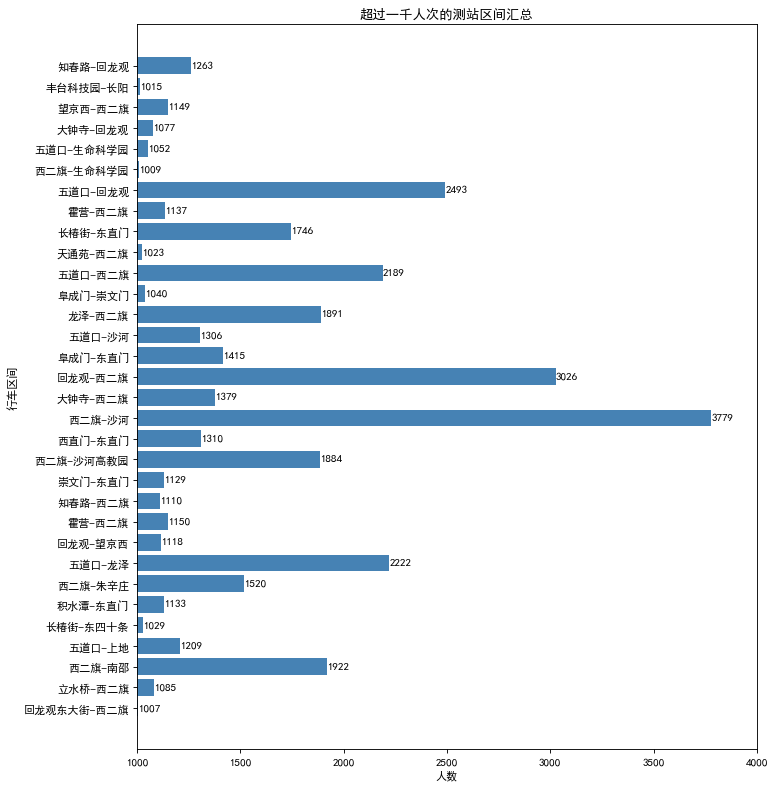

In [31]:
plt.figure(figsize=(10, 12), dpi=80)
plt.subplot(1, 1, 1)
plt.barh(range(32), val,color='steelblue') 
# 从下往上画 
plt.yticks(range(32), ind) 
plt.xlim(1000,4000) 
plt.xlabel("人数") 
plt.ylabel('行车区间')
plt.title("超过一千人次的测站区间汇总") 
for x, y in enumerate(val): 
    plt.text(y + 0.2, x - 0.1, '%s' % y) 
plt.show()


In [32]:
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt','r') as od_f:
    dic = dict()
    d = dict()
    line = od_f.readline()
    line = od_f.readline()
    while line:
        line_list = line[:-1].split(',')
        dic[line_list[0]] = (line_list[1],line_list[2])
        line = od_f.readline()
        
    for k,v in dt.items():
        li = k.split('-')
        if len(li[1]) <= 3:
            if dic[li[0]][0] in d.keys():
                d[dic[li[0]][0]] += v
            else: d[dic[li[0]][0]] = v
            if dic[li[1]][0] in d.keys():
                d[dic[li[1]][0]] += v
            else: d[dic[li[1]][0]] = v

In [33]:
bb = sorted(d.items(),key = lambda item : item[1],reverse=True)
print(bb)
inde = []
valu = []
for unit in bb:
    if unit[1] >= 20000:
        inde.append(unit[0])
        valu.append(unit[1])

[('西二旗', 51887), ('东直门', 50063), ('西直门', 43142), ('阜成门', 33419), ('五道口', 31190), ('北京南站', 30192), ('东四十条', 29013), ('中关村', 28456), ('积水潭', 28285), ('朝阳门', 27404), ('北京西站', 26373), ('上地', 24336), ('回龙观', 24237), ('北京站', 24215), ('海淀黄庄', 23369), ('长椿街', 23204), ('龙泽', 22142), ('霍营', 21881), ('宣武门', 19664), ('人民大学', 19093), ('知春路', 19001), ('望京西', 18005), ('崇文门', 17923), ('沙河', 17068), ('动物园', 16803), ('西单', 16618), ('魏公村', 16601), ('十里河', 16388), ('陶然亭', 16075), ('公益西桥', 16044), ('立水桥', 15540), ('西红门', 15424), ('天通苑北', 15189), ('鼓楼大街', 15080), ('六里桥东', 15073), ('新宫', 15011), ('丰台科技园', 14819), ('天通苑', 14533), ('望京', 14442), ('角门西', 13955), ('宋家庄', 13863), ('回龙观东大街', 13791), ('灵境胡同', 13740), ('前门', 13482), ('雍和宫', 13425), ('北宫门', 13418), ('生命科学园', 13315), ('国家图书馆', 13165), ('潘家园', 13065), ('大钟寺', 13001), ('安定门', 12875), ('育新', 12566), ('西钓鱼台', 12310), ('奥林匹克公园', 12204), ('柳芳', 12133), ('大红门', 12074), ('南邵', 11689), ('白石桥南', 11658), ('车公庄', 11479), ('苹果园', 11088), ('长春桥', 11049), ('广安门内', 1

In [34]:
inde

['西二旗',
 '东直门',
 '西直门',
 '阜成门',
 '五道口',
 '北京南站',
 '东四十条',
 '中关村',
 '积水潭',
 '朝阳门',
 '北京西站',
 '上地',
 '回龙观',
 '北京站',
 '海淀黄庄',
 '长椿街',
 '龙泽',
 '霍营']

In [1]:
plt.figure(figsize=(10, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.barh(range(len(inde)), valu,color='steelblue') 
# 从下往上画 
plt.yticks(range(len(inde)), inde) 
plt.xlim(10000,60000) 
plt.xlabel("人数") 
plt.ylabel('行车区间')
plt.title("超过一千人次的测站区间汇总") 
for x, y in enumerate(valu): 
    plt.text(y + 0.2, x - 0.1, '%s' % y) 
plt.show()

NameError: name 'plt' is not defined

In [1]:
dict2 = dict()
dict3 = dict()
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt','r') as od_f:
    line2 = od_f.readline()
    line2 = od_f.readline()
    pre = ''
    ii = 1
    index = ''
    
    while line2:
        strr = line2.split(',')
        #print(strr[1],pre)
        if ii != int(strr[2]):#判断上一个车站所在线路与当前车站所在线路是否是一条线
            pre = ''
            ii = int(strr[2])
        else:
            if pre is '':
                pass
            else:
                if strr[1] in dict3.keys():
                    s = dict3[strr[1]]
                else:
                    s = strr[0]
                if s in dict2[pre] or s is pre:
                    pass
                else:
                    dict2[pre].append(s)
        #print(pre,dict2.keys())
        if strr[1] not in dict3.keys():
            dict3[strr[1]] = strr[0]
            index = strr[0]
            dict2[index] = []
            if pre is '': 
                pass
            else:
                dict2[index].append(pre)
        else:
            index =dict3[strr[1]]
            #print(index)
            if strs in dict3.keys():
                if dict3[strs] in dict2[index] or dict3[strs] is index:
                    pass
                else:
                    if pre is '':
                        pass
                    else:
                        dict2[index].append(dict3[strs])
            else:
                if dict3[strs] in dict2[index] or dict3[strs] is index:
                    pass
                else:
                    if pre is '':
                        pass
                    else:
                        dict2[index].append(pre)
        #print(dict3)
        pre = index
        strs = strr[1]
        line2 = od_f.readline()

In [1]:
#修改
dict2 = dict()
dict3 = dict()
dict4 = dict()
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt','r') as od_f:
    line2 = od_f.readline()
    line2 = od_f.readline()
    pre = ''
    ii = 1
    index = ''
    
    while line2:
        strr = line2[:-1].split(',')
        dict4[strr[0]] = strr[1]
        dict2[strr[0]] = []
        if ii != int(strr[2]):#判断上一个车站所在线路与当前车站所在线路是否是一条线
            pre = ''
            ii = int(strr[2])
        else:
            if pre is '':
                pass
            else:
                dict2[strr[0]].append(pre)
                dict2[pre].append(strr[0])
        if strr[1] not in dict3.keys():
            dict3[strr[1]] = [strr[0]]
        else:
            dict3[strr[1]].append(strr[0])
        pre = strr[0]
        line2 = od_f.readline()
        
    for k2,v2 in dict2.items():
        if len(dict3[dict4[k2]]) > 1:
            for ij in dict3[dict4[k2]]:
                if int(ij) != int(k2) and ij not in v2:
                    dict2[k2].append(ij)

In [2]:
ll=[]
for iii in dict2.keys():
    for jj in dict2[iii]:
        ll.append(jj)
sss = set(ll)
print(len(dict2))
len(sss)

328


328

In [3]:
for k,v in dict2.items():
    print(k,v)

1 ['2']
2 ['1', '3']
3 ['2', '4']
4 ['3', '5']
5 ['4', '6']
6 ['5', '7']
7 ['6', '8']
8 ['7', '9', '221']
9 ['8', '10', '172']
10 ['9', '11']
11 ['10', '12']
12 ['11', '13', '41']
13 ['12', '14', '75']
14 ['13', '15']
15 ['14', '16']
16 ['15', '17']
17 ['16', '18', '110']
18 ['17', '19', '48']
19 ['18', '20']
20 ['19', '21', '196']
21 ['20', '22']
22 ['21', '23', '24']
23 ['22', '25']
24 ['25', '22']
25 ['24', '26', '23']
26 ['25', '27']
27 ['26', '28']
28 ['27', '29']
29 ['28', '30']
30 ['29', '31']
31 ['30', '32']
32 ['31', '33']
33 ['32', '34']
34 ['33', '35']
35 ['34', '36']
36 ['35']
37 ['38']
38 ['37', '39', '70', '238']
39 ['38', '40', '136']
40 ['39', '41']
41 ['40', '42', '12']
42 ['41', '43']
43 ['42', '44', '76']
44 ['43', '45']
45 ['44', '46']
46 ['45', '47', '111']
47 ['46', '48']
48 ['47', '49', '18']
49 ['48', '50', '141']
50 ['49', '51']
51 ['50', '52', '55', '253']
52 ['51', '53', '105']
53 ['52', '54']
54 ['53', '153']
55 ['56', '51', '253']
56 ['55', '57', '202']
57 

In [4]:
for kk,vv in dict3.items():
    print(kk,vv)

苹果园 ['1']
古城 ['2']
八角游乐园 ['3']
八宝山 ['4']
玉泉路 ['5']
五棵松 ['6']
万寿路 ['7']
公主坟 ['8', '221']
军事博物馆 ['9', '172']
木樨地 ['10']
南礼士路 ['11']
复兴门 ['12', '41']
西单 ['13', '75']
天安门西 ['14']
天安门东 ['15']
王府井 ['16']
东单 ['17', '110']
建国门 ['18', '48']
永安里 ['19']
国贸 ['20', '196']
大望路 ['21']
四惠 ['22', '24']
四惠东 ['23', '25']
高碑店 ['26']
传媒大学 ['27']
双桥 ['28']
管庄 ['29']
八里桥 ['30']
通州北苑 ['31']
果园 ['32']
九棵树 ['33']
梨园 ['34']
临河里 ['35']
土桥 ['36']
积水潭 ['37']
西直门 ['38', '70', '238']
车公庄 ['39', '136']
阜成门 ['40']
长椿街 ['42']
宣武门 ['43', '76']
和平门 ['44']
前门 ['45']
崇文门 ['46', '111']
北京站 ['47']
朝阳门 ['49', '141']
东四十条 ['50']
东直门 ['51', '55', '253']
雍和宫 ['52', '105']
安定门 ['53']
鼓楼大街 ['54', '153']
三元桥 ['56', '202']
T3航站楼 ['57']
T2航站楼 ['58']
安河桥北 ['59']
北宫门 ['60']
西苑 ['61']
圆明园 ['62']
北京大学东门 ['63']
中关村 ['64']
海淀黄庄 ['65', '213']
人民大学 ['66']
魏公村 ['67']
国家图书馆 ['68', '169']
动物园 ['69']
新街口 ['71']
平安里 ['72', '137']
西四 ['73']
灵境胡同 ['74']
菜市口 ['77', '312']
陶然亭 ['78']
北京南站 ['79']
马家堡 ['80']
角门西 ['81', '230']
公益西桥 ['82']
新宫 ['83']
西红门 [

In [5]:
abcd = dict()

In [46]:
ist = []

In [47]:
ds =dict()
ds1 = dict()
list3 = []
for k in dict2.keys():
    ds[k] = 0
    ds1[k] = 1

from collections import deque
def dfs(h):
    a=h
    queue = deque()
    queue.append(h)
    ds[h] = 0
    
    while len(queue)!=0:
        st = queue.popleft()
        ds[st] = 1
        for k in dict2[st]:
            if ds[k] == 0:
                ds[k]=1
                ds1[k]=st
                queue.append(k)
    ds1[a]='0'
    #print(a)
def prin(ds1,v):
    s=v
    if ds1[s] is '0':
        pass
    else:
        prin(ds1,ds1[s])
        ist.append(s)
        #print(s)

In [8]:
dfs('84')
ist.append('84')
prin(ds1,'47')

In [9]:
print(ist)

['84', '83', '82', '81', '80', '79', '78', '77', '76', '43', '44', '45', '46', '47']


In [10]:
abcd['2'] = ist
ist = []

In [48]:
dfs('251')
ist.append('251')
prin(ds1,'45')
abcd['19'] = ist

In [49]:
abcd

{'19': ['251', '252', '253', '51', '50', '49', '48', '47', '46', '45'],
 '2': ['84',
  '83',
  '82',
  '81',
  '80',
  '79',
  '78',
  '77',
  '76',
  '43',
  '44',
  '45',
  '46',
  '47'],
 '7': ['163',
  '162',
  '161',
  '160',
  '159',
  '158',
  '157',
  '156',
  '155',
  '154',
  '153',
  '54']}

In [12]:
list4 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19]
# 1,1号线 10,10号线 11,机场线 12,亦庄线 13,13号线 14,14号线 15,15号线 18,昌平线 19,房山线
# 2,2号线 3,八通线 4,4号线 5,5号线 6,6号线 7,7号线 8,8号线 9,9号线
dic1 = dict()
dic2 = dict()
for i in list4:
    dic1[i]=[]

with open('datasets/竞赛数据-最新/附件 3 列车运行图数据.txt', 'r') as ff:
    line = ff.readline()
    line = ff.readline()
    li = []
    j = 1
    h = '100000'
    dic2[h] = []
    while line:
        str1 = line[:-1].split(',')
        if j == int(str1[0]):
            if int(h) == int(str1[1]):
                dic2[h].append([str1[2],str1[3],str1[4]])
            else:
                h = str1[1]
                dic2[h] = []
                dic2[h].append([str1[2],str1[3],str1[4]])
            li.append(str1[1])
            h = str1[1]
        else:
            #print(j,str1[0])
            set1 = set(li)
            l = sorted(list(set1))
            dic1[j] = l
            j = int(str1[0])
            if int(h) == int(str1[1]):
                dic2[h].append([str1[2],str1[3],str1[4]])
            else:
                h = str1[1]
                dic2[h] = []
                dic2[h].append([str1[2],str1[3],str1[4]])
            h = str1[1]
            li=[]
            li.append(str1[1])
        line = ff.readline()
    set1 = set(li)
    l = sorted(list(set1))
    dic1[j] = l

In [13]:
for k in dic1.keys():
    print(k,len(dic1[k]))

1 320
2 262
3 173
4 266
5 252
6 194
7 163
8 191
9 167
10 297
11 67
12 98
13 231
14 94
15 145
18 98
19 107


In [14]:
dic1

{1: ['100000',
  '101001',
  '102000',
  '102002',
  '102004',
  '102006',
  '102008',
  '102010',
  '102012',
  '102014',
  '102016',
  '102018',
  '102020',
  '102022',
  '102024',
  '102026',
  '102028',
  '102030',
  '102032',
  '102034',
  '102036',
  '102038',
  '102040',
  '102042',
  '102044',
  '102046',
  '103000',
  '103002',
  '103004',
  '103006',
  '103008',
  '103010',
  '103012',
  '103014',
  '103016',
  '103018',
  '103020',
  '103022',
  '103024',
  '103026',
  '103028',
  '103030',
  '103032',
  '103034',
  '103036',
  '103038',
  '103040',
  '103042',
  '103044',
  '103046',
  '103048',
  '103050',
  '103052',
  '103054',
  '103056',
  '103058',
  '103060',
  '103062',
  '103064',
  '103066',
  '103068',
  '103070',
  '103072',
  '103074',
  '103076',
  '103078',
  '103080',
  '103082',
  '103084',
  '103086',
  '103088',
  '103090',
  '103092',
  '103094',
  '103096',
  '103098',
  '103100',
  '103102',
  '103104',
  '103106',
  '103108',
  '103110',
  '103112',
 

In [15]:
dic2

{'100000': [['12', '5:09:30', '5:10:00'],
  ['11', '5:11:00', '5:11:30'],
  ['10', '5:13:30', '5:14:00'],
  ['9', '5:15:40', '5:16:20'],
  ['8', '5:18:00', '5:18:40'],
  ['7', '5:20:30', '5:21:10'],
  ['6', '5:23:20', '5:24:00'],
  ['5', '5:26:20', '5:26:50'],
  ['4', '5:28:50', '5:29:20'],
  ['3', '5:31:50', '5:32:20'],
  ['2', '5:34:50', '5:35:20'],
  ['1', '5:39:00', '5:40:00']],
 '101001': [['12', '5:14:30', '5:15:00'],
  ['13', '5:17:00', '5:17:30'],
  ['14', '5:19:00', '5:19:28'],
  ['15', '5:20:58', '5:21:28'],
  ['16', '5:22:58', '5:23:28'],
  ['17', '5:24:48', '5:25:33'],
  ['18', '5:27:23', '5:28:08'],
  ['19', '5:30:08', '5:30:38'],
  ['20', '5:31:48', '5:32:33'],
  ['21', '5:34:33', '5:35:03'],
  ['22', '5:37:33', '5:38:03'],
  ['23', '5:40:33', '5:41:33']],
 '102000': [['22', '4:56:30', '4:57:00'],
  ['21', '4:59:30', '5:00:10'],
  ['20', '5:02:10', '5:02:55'],
  ['19', '5:04:05', '5:04:35'],
  ['18', '5:06:35', '5:07:20'],
  ['17', '5:09:10', '5:09:50'],
  ['16', '5:11:10

In [16]:
abcde = dict()
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt', 'r') as f:
    line = f.readline()
    line = f.readline()
    while line:
        sst = line[:-1].split(',')
        abcde[sst[0]] = sst[1]
        line = f.readline()

In [17]:
abc = [2,7,19,31,41,71,83,89,101,113,2845,124801,140610,164834,193196,223919,275403,286898,314976,315621]
asd = dict()
asdf = dict()
with open('datasets/竞赛数据-最新/附件 1 线网乘客O-D数据.txt', 'r') as f:
    line = f.readline()
    line = f.readline()
    while line:
        strr = line[:-1].split(',')
        if int(strr[0]) in abc:
            asd[strr[0]]=[strr[1], strr[2]]
            asdf[strr[0]]=[strr[-2], strr[-1]]
        else:
            pass
        line = f.readline()

In [18]:
dic_stand = dict()
dic_num = dict()
dic_name = dict()
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt') as f:
    line = f.readline()
    line = f.readline()
    while line:
        st = line[:-1].split(',')
        dic_stand[st[0]] = st[2]
        line = f.readline()

In [19]:
for k,v in abcd.items():
    print(k, '进站时间'+asdf[k][0], v, '出站时间'+asdf[k][1])
    for loc in v:
        print(abcde[loc]+' ',end='')
        print('('+dic_stand[loc]+')',end='')
    print()
    print()

2 进站时间8:24:00 ['84', '83', '82', '81', '80', '79', '78', '77', '76', '43', '44', '45', '46', '47'] 出站时间9:14:24
西红门 (4)新宫 (4)公益西桥 (4)角门西 (4)马家堡 (4)北京南站 (4)陶然亭 (4)菜市口 (4)宣武门 (4)宣武门 (2)和平门 (2)前门 (2)崇文门 (2)北京站 (2)



In [63]:
dic_1 = {}
def list_split(listt):
    s = listt[0]
    k = dic_stand[s]
    dic_1[k] = []
    
    for i in listt:
        if int(dic_stand[i]) != int(k):
            k = dic_stand[i]
            dic_1[k] = [i]
        else:
            dic_1[k].append(i) 
            
        k = dic_stand[i]

In [64]:
list_split(abcd['2'])
dic_1

{'2': ['43', '44', '45', '46', '47'],
 '4': ['84', '83', '82', '81', '80', '79', '78', '77', '76']}

In [28]:
def m_split(list2):
    return [list2[0][0], list2[-1][0]]
def ret_start(list2):
    return [list2[0][1], list2[-1][1]]
def ret_end(list2):
    return [list2[0][2], list2[-1][2]]
def mm_split(list2,st):
    for lin in list2:
        if int(st) is int(lin[0]):
            return lin[1]

In [65]:
from datetime import datetime
dddd = {}
dddd['2'] = []
s_t = asdf['2'][0]
start_time = datetime.strptime(s_t, '%H:%M:%S')

for kx,vx in dic_1.items():
    leiche = dic1[int(kx)]
    for lc in leiche:
        #print(dic2[lc])
        lis1 = m_split(dic2[lc])
        if int(lis1[0]) <= int(vx[0]) and int(lis1[1]) >= int(vx[-1]):
            #print(dic2[lc],vx[0])
            tim = mm_split(dic2[lc],vx[0])
            ti = datetime.strptime(tim, '%H:%M:%S')
            if start_time < ti:
                dddd['2'].append(lc)
                endtim = mm_split(dic2[lc], vx[-1])
                start_time = datetime.strptime(tim, '%H:%M:%S')
                break

In [66]:
dddd

{'2': ['414050', '211221']}

In [14]:
dic_stand = dict()
dic_num = dict()
dic_name = dict()
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt') as f:
    line = f.readline()
    line = f.readline()
    while line:
        st = line[:-1].split(',')
        if st[1] in dic_name.keys():
            ind = dic_name[st[1]]
            dic_num[ind] +=1
            dic_stand[st[0]] = (ind,st[2])
        else:
            dic_num[st[0]] = 1
            dic_name[st[1]] = st[0]
            dic_stand[st[0]] = (st[0],st[2])
        line = f.readline()

In [15]:
print(dic_stand)

{'1': ('1', '1'), '2': ('2', '1'), '3': ('3', '1'), '4': ('4', '1'), '5': ('5', '1'), '6': ('6', '1'), '7': ('7', '1'), '8': ('8', '1'), '9': ('9', '1'), '10': ('10', '1'), '11': ('11', '1'), '12': ('12', '1'), '13': ('13', '1'), '14': ('14', '1'), '15': ('15', '1'), '16': ('16', '1'), '17': ('17', '1'), '18': ('18', '1'), '19': ('19', '1'), '20': ('20', '1'), '21': ('21', '1'), '22': ('22', '1'), '23': ('23', '1'), '24': ('22', '3'), '25': ('23', '3'), '26': ('26', '3'), '27': ('27', '3'), '28': ('28', '3'), '29': ('29', '3'), '30': ('30', '3'), '31': ('31', '3'), '32': ('32', '3'), '33': ('33', '3'), '34': ('34', '3'), '35': ('35', '3'), '36': ('36', '3'), '37': ('37', '2'), '38': ('38', '2'), '39': ('39', '2'), '40': ('40', '2'), '41': ('12', '2'), '42': ('42', '2'), '43': ('43', '2'), '44': ('44', '2'), '45': ('45', '2'), '46': ('46', '2'), '47': ('47', '2'), '48': ('18', '2'), '49': ('49', '2'), '50': ('50', '2'), '51': ('51', '2'), '52': ('52', '2'), '53': ('53', '2'), '54': ('54

In [16]:
dicc = dict()
d = dic_stand[ist[0]][1]
for i in range(len(ist)):
    dicc[ist[i]] = dic_stand[ist[i]][1]

IndexError: list index out of range

In [17]:
print(ist)
dicc

[]


{}

In [19]:
abc = [2,7,19,31,41,71,83,89,101,113,2845,124801,140610,164834,193196,223919,275403,286898,314976,315621]
asd = dict()
asdf = dict()
with open('datasets/竞赛数据-最新/附件 1 线网乘客O-D数据.txt', 'r') as f:
    line = f.readline()
    line = f.readline()
    while line:
        strr = line[:-1].split(',')
        if int(strr[0]) in abc:
            if int(dic_stand[strr[1]][0]) == int(strr[1]):
                sta = strr[1]
            else:
                sta = dic_stand[strr[1]][0]
                
            if int(dic_stand[strr[2]][0]) == int(strr[2]):
                end = strr[2]
            else:
                end = dic_stand[strr[2]][0]
            asd[strr[0]]=[sta,end]
            asdf[strr[0]]=[strr[-2],strr[-1]]
        else:
            pass
        line = f.readline()

In [20]:
for t,v in asd.items():
    print(t,v)

2 ['84', '47']
7 ['163', '54']
19 ['251', '45']
31 ['95', '38']
41 ['1', '52']
71 ['94', '47']
83 ['164', '45']
89 ['145', '39']
101 ['176', '47']
113 ['307', '47']
2845 ['93', '50']
124801 ['59', '268']
140610 ['166', '268']
164834 ['11', '279']
193196 ['34', '276']
223919 ['229', '37']
275403 ['150', '241']
286898 ['86', '244']
314976 ['3', '241']
315621 ['19', '251']


In [32]:
for k,v in abcd.items():
    print(k,v)

315621 []
2 ['84', '83', '82', '81', '80', '79', '78', '77', '43', '44', '45', '46', '47']
7 ['163', '162', '161', '160', '159', '158', '157', '156', '155', '154', '54']
19 ['251', '252', '51', '50', '49', '18', '17', '46', '45']
31 ['95', '96', '97', '164', '245', '244', '243', '242', '241', '211', '239', '38']
41 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '171', '134', '135', '39', '72', '138', '139', '108', '107', '106', '52']


In [30]:
for t,v in abcd.items():
    for h in v:
        print(dic_stand[h][1]+' ',end='')
    print()


4 4 4 4 4 4 4 4 2 2 2 2 2 
8 8 8 8 8 8 8 8 8 8 2 
13 13 2 2 2 1 1 2 2 
5 5 5 8 13 13 13 13 13 10 13 2 
1 1 1 1 1 1 1 1 1 9 6 6 2 4 6 6 5 5 5 2 


In [481]:
abcde = dict()
with open('datasets/竞赛数据-最新/附件 2 线网基础信息表-1 基础数据-车站表.txt', 'r') as f:
    line = f.readline()
    line = f.readline()
    while line:
        sst = line[:-1].split(',')
        abcde[sst[0]] = sst[1]
        line = f.readline()

In [495]:
for k,v in abcd.items():
    print(k, '进站时间'+asdf[k][0], v, '出站时间'+asdf[k][1])
    for loc in v:
        print(abcde[loc]+' ',end='')
        print('('+dic_stand[loc][1]+')',end='')
    print()
    print()

2 进站时间8:24:00 ['84', '83', '82', '81', '80', '79', '78', '77', '43', '44', '45', '46', '47'] 出站时间9:14:24
西红门 (4)新宫 (4)公益西桥 (4)角门西 (4)马家堡 (4)北京南站 (4)陶然亭 (4)菜市口 (4)宣武门 (2)和平门 (2)前门 (2)崇文门 (2)北京站 (2)

7 进站时间6:58:00 ['163', '162', '161', '160', '159', '158', '157', '156', '155', '154', '54'] 出站时间7:29:23
育新 (8)西小口 (8)永泰庄 (8)林萃桥 (8)森林公园南门 (8)奥林匹克公园 (8)奥体中心 (8)北土城 (8)安华桥 (8)安德里北街 (8)鼓楼大街 (2)

19 进站时间8:47:00 ['251', '252', '51', '50', '49', '18', '17', '46', '45'] 出站时间9:22:29
光熙门 (13)柳芳 (13)东直门 (2)东四十条 (2)朝阳门 (2)建国门 (1)东单 (1)崇文门 (2)前门 (2)

31 进站时间7:30:00 ['95', '96', '97', '164', '245', '244', '243', '242', '241', '211', '239', '38'] 出站时间8:16:03
天通苑 (5)天通苑南 (5)立水桥 (5)霍营 (8)回龙观 (13)龙泽 (13)西二旗 (13)上地 (13)五道口 (13)知春路 (10)大钟寺 (13)西直门 (2)

41 进站时间8:17:00 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '171', '134', '135', '39', '72', '138', '139', '108', '107', '106', '52'] 出站时间9:17:12
苹果园 (1)古城 (1)八角游乐园 (1)八宝山 (1)玉泉路 (1)五棵松 (1)万寿路 (1)公主坟 (1)军事博物馆 (1)白堆子 (9)白石桥南 (6)车公庄西 (6)车公庄 (2)平安里 (4)北海北 (6)南锣鼓巷 (

In [71]:
asdf

{'101': ['10:07:00', '11:04:03'],
 '113': ['5:59:00', '6:56:24'],
 '124801': ['7:52:00', '8:40:42'],
 '140610': ['11:01:00', '11:50:50'],
 '164834': ['8:17:00', '9:42:49'],
 '19': ['8:47:00', '9:22:29'],
 '193196': ['7:22:00', '9:20:42'],
 '2': ['8:24:00', '9:14:24'],
 '223919': ['6:46:00', '8:48:25'],
 '275403': ['8:32:00', '9:40:23'],
 '2845': ['7:25:00', '8:45:20'],
 '286898': ['11:14:00', '12:40:06'],
 '31': ['7:30:00', '8:16:03'],
 '314976': ['7:23:00', '8:20:49'],
 '315621': ['8:14:00', '8:42:51'],
 '41': ['8:17:00', '9:17:12'],
 '7': ['6:58:00', '7:29:23'],
 '71': ['9:02:00', '9:52:04'],
 '83': ['8:33:00', '9:20:24'],
 '89': ['9:25:00', '9:54:23']}

In [34]:
abcd = dict()
abcd['2'] = ['84', '83', '82', '81', '80', '79', '78', '77', '43', '44', '45', '46', '47']
abcd['7'] = ['163', '162', '161', '160', '159', '158', '157', '156', '155', '154', '54']
abcd['19'] = ['251', '252', '51', '50', '49', '18', '17', '46', '45']
abcd['31'] = ['95', '96', '97', '164', '245', '244', '243', '242', '241', '211', '239', '38']
abcd['41'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '171', '134', '135', '39', '72', '138', '139', '108', '107', '106', '52']

In [35]:
for k,v in abcd.items():
    print(k,v)

2 ['84', '83', '82', '81', '80', '79', '78', '77', '43', '44', '45', '46', '47']
7 ['163', '162', '161', '160', '159', '158', '157', '156', '155', '154', '54']
19 ['251', '252', '51', '50', '49', '18', '17', '46', '45']
31 ['95', '96', '97', '164', '245', '244', '243', '242', '241', '211', '239', '38']
41 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '171', '134', '135', '39', '72', '138', '139', '108', '107', '106', '52']


In [61]:
for t,v in abcd.items():
    for h in v:
        print(dic_stand[h][1]+' ',end='')
    print()

4 4 4 4 4 4 4 4 2 2 2 2 2 
8 8 8 8 8 8 8 8 8 8 2 
13 13 2 2 2 1 1 2 2 
5 5 5 8 13 13 13 13 13 10 13 2 
1 1 1 1 1 1 1 1 1 9 6 6 2 4 6 6 5 5 5 2 


In [69]:
print(dic_stand['84'][1])
abcd['2']

4


['84', '83', '82', '81', '80', '79', '78', '77', '43', '44', '45', '46', '47']

In [133]:
print('000'+'123')

000123


In [145]:
def list_split(dic_l,listt):
    s = listt[0]
    k = dic_stand[s][1]
    dic_l[k] = []
    
    for i in listt:
        if int(dic_stand[i][1]) != int(k):
            k = dic_stand[i][1]
            dic_l[k] = [i]
        else:
            dic_l[k].append(i) 
            
        k = dic_stand[i][1]

In [151]:
list_split(dic_1,abcd['7'])
dic_1

{'2': ['54'],
 '8': ['163', '162', '161', '160', '159', '158', '157', '156', '155', '154']}

In [150]:
dic_1={}

In [117]:
def m_split(list2):
    return [list2[0][0], list2[-1][0]]
def ret_start(list2):
    return [list2[0][1], list2[-1][1]]
def ret_end(list2):
    return [list2[0][2], list2[-1][2]]
def mm_split(list2,st):
    for lin in list2:
        if int(st) is int(lin[0]):
            return lin[1]

In [152]:
from datetime import datetime
dddd = {}
dddd['7'] = []
s_t = asdf['7'][0]
start_time = datetime.strptime(s_t, '%H:%M:%S')

for kx,vx in dic_1.items():
    leiche = dic1[int(kx)]
    for lc in leiche:
        print(dic2[lc])
        lis1 = m_split(dic2[lc])
        if int(lis1[0]) <= int(vx[0]) and int(lis1[1]) >= int(vx[-1]):
            #print(dic2[lc],vx[0])
            tim = mm_split(dic2[lc],vx[0])
            ti = datetime.strptime(tim, '%H:%M:%S')
            if start_time < ti:
                dddd['7'].append(lc)
                endtim = mm_split(dic2[lc], vx[-1])
                start_time = datetime.strptime(tim, '%H:%M:%S')
                break

[['165', '4:44:30', '4:45:00'], ['164', '4:46:48', '4:47:38'], ['163', '4:50:08', '4:50:38'], ['162', '4:52:38', '4:53:18'], ['161', '4:55:03', '4:55:43'], ['160', '4:58:43', '4:59:13'], ['159', '5:02:13', '5:02:43'], ['158', '5:04:28', '5:04:58'], ['157', '5:07:13', '5:07:43'], ['156', '5:09:19', '5:10:09'], ['155', '5:11:49', '5:12:19'], ['154', '5:13:49', '5:13:49'], ['153', '5:15:09', '5:15:59'], ['152', '5:17:49', '5:18:19'], ['151', '5:19:59', '5:20:59']]
[['165', '4:53:30', '4:54:00'], ['164', '4:55:48', '4:56:38'], ['163', '4:59:08', '4:59:38'], ['162', '5:01:38', '5:02:18'], ['161', '5:04:03', '5:04:43'], ['160', '5:07:43', '5:08:13'], ['159', '5:11:13', '5:11:43'], ['158', '5:13:28', '5:13:58'], ['157', '5:16:13', '5:16:43'], ['156', '5:18:19', '5:19:09'], ['155', '5:20:49', '5:21:19'], ['154', '5:22:49', '5:22:49'], ['153', '5:24:09', '5:24:59'], ['152', '5:26:49', '5:27:19'], ['151', '5:28:59', '5:29:59']]
[['165', '5:02:30', '5:03:00'], ['164', '5:04:48', '5:05:38'], ['163

In [153]:
dddd['7']

['811017', '211221']